In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

In [85]:
df = pd.DataFrame(np.random.rand(1000,2)*100)
df

,0,1
0,7.703090,2.078800
1,6.114946,36.083503
2,62.511990,62.819277
3,12.784446,38.377146
4,47.484300,65.703249
...,...,...
995,49.751320,36.884813
996,27.055066,30.815444
997,37.227140,95.588241
998,75.434254,47.411662


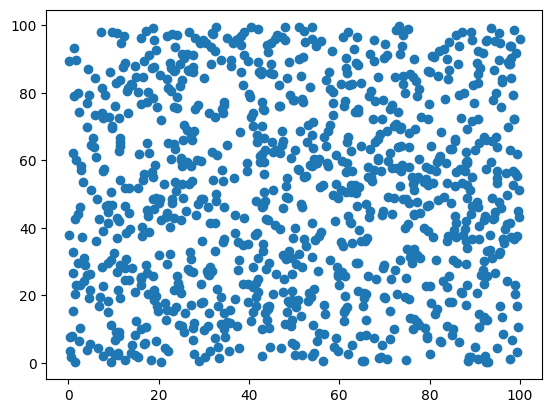

In [86]:
plt.scatter(df[0],df[1])

In [87]:
k= 5
centroids = pd.DataFrame(np.random.rand(k,2)*100)
print(centroids)

           0          1
0  39.577365  76.761276
1  64.034479  77.972113
2  90.366789  53.612769
3  48.741787  97.519913
4  93.247377  91.438372


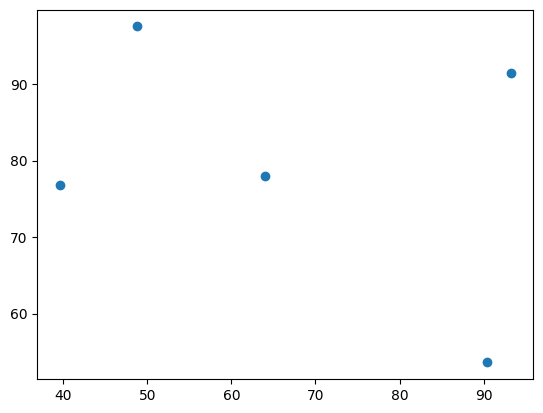

In [88]:
plt.scatter(centroids[0],centroids[1])

In [89]:
for ind in centroids.index:
    print(ind)

0
1
2
3
4


In [90]:
cluster = {}
for ind_C in centroids.index:
    key = 'cluster_'+str(ind_C)
    cluster[key]=[]
print(cluster)


{'cluster_0': [], 'cluster_1': [], 'cluster_2': [], 'cluster_3': [], 'cluster_4': []}


In [91]:
def dist (a,b):
    return int(math.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2))

In [92]:
def comp_dicts(dict1,dict2):    
    return dict1==dict2
    if dict1.keys() != dict2.keys():
        print('keys are different')
        return False
    for key in dict1.keys():
        if len(dict1[key]) != len(dict2[key]):
            print('number of rows are different')
            return False
        for id in range(len(dict1[key])):
            coordinates = dict1[key][id]
            coordinates2 = dict2[key][id]
            diff_x = abs(coordinates[0]-coordinates2[0])
            diff_y = abs(coordinates[1]-coordinates2[1])
            if diff_y > 0.1 or diff_x >0.1:
                print('value difference threshold not reached')
                return False
    return True

In [93]:
cluster_old = {'key':'value'}
colors_list = ['r','g','b','c','y','m','k','purple','darkred','orange']
colors = {key0 : color for key0,color in zip(cluster.keys(),colors_list)}
print(colors)

{'cluster_0': 'r', 'cluster_1': 'g', 'cluster_2': 'b', 'cluster_3': 'c', 'cluster_4': 'y'}


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
{'cluster_0': [[7.703089914275829, 2.078799533531095], [6.114945812840389, 36.083502783002345], [12.784445806919742, 38.37714617373897], [6.860222767602031, 16.755166579854574], [8.810157239278361, 29.539713711752725], [4.73877701109755, 5.4679061237351], [41.95862910942194, 20.96452565770628], [39.89457586660785, 23.34867326827824], [0.9880886002815337, 32.94090233968766], [43.188844818216346, 33.2413776713983], [44.07424747498757, 12.781714081516348], [3.3599875673128166, 24.336798174168628], [26.425042548697352, 27.74656664286367], [23.33253342966646, 42.84423334786121], [6.630168962867867, 4.2971701896957875], [42.95788201149563, 1.9271515973871889], [11.16592826795194, 42.15293612214245], [27.936368591578432, 11.795074493684476], [2.1639725859423753, 29.50955392064033], [6.945922977787122, 19.67507847369916], [9.437942094363216, 50.51122465644878], [43.10588493525371, 35.1815008444

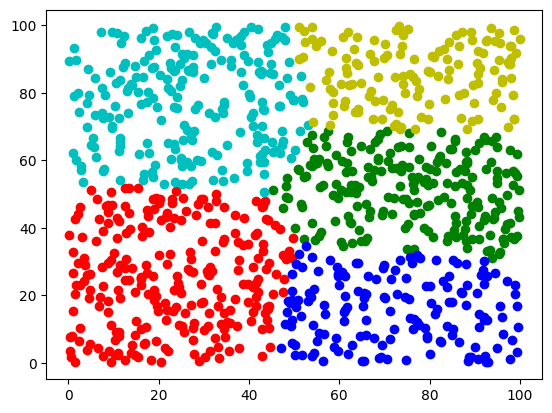

In [94]:
c=0
while not comp_dicts(cluster_old,cluster):
    print(c)
    cluster_old = copy.deepcopy(cluster)

    cluster.clear()
    for ind_C in centroids.index:
        key = 'cluster_'+str(ind_C)
        cluster[key]=[]

    for ind1 in df.index:
        distance = float('inf')
        for ind2 in centroids.index:
            dist_check = dist(df.iloc[ind1],centroids.iloc[ind2])            
            if dist_check<distance:
                distance = dist_check
                cluster_no = ind2
        key = 'cluster_'+str(cluster_no)
        cluster[key].append([df[0][ind1],df[1][ind1]])

    
    for id in np.arange(len(centroids)):
        sumx=0
        sumy=0
        cluster_no = 'cluster_'+str(id)
        for a in np.arange(len(cluster[cluster_no])):
            sumx+=cluster[cluster_no][a][0]
            sumy+=cluster[cluster_no][a][1]
        centroids[0][id] = sumx/len((cluster[cluster_no]))
        centroids[1][id] = sumy/len((cluster[cluster_no]))    
    c+=1
for key in cluster:
    for x,y in cluster[key]:
        plt.scatter(x,y, c=colors[key])

    
print(cluster)
        

In [95]:
print(cluster['cluster_1'])

[[62.51199018212632, 62.81927692147475], [97.84314818606677, 63.039434227341815], [94.81242669808971, 64.00914843738106], [74.2024923647144, 48.54797021279336], [90.4224495321508, 47.64899612955392], [95.2861660330217, 32.42042472246991], [78.76776996359618, 53.587736061326986], [96.40753243845145, 35.39351572840731], [98.46731099635393, 52.73524641684587], [74.63505294997847, 39.93917063714731], [62.657665678935444, 50.631888723636656], [63.52107928122618, 52.6644142808115], [66.17836949991785, 37.06185049811923], [60.337930419337596, 51.27067304447751], [48.708306542048916, 48.930112655332394], [84.44077007311496, 63.35988949680594], [76.6357490886506, 33.86646041797425], [51.498819528909536, 47.05587102785162], [52.94613346261664, 65.4629482277749], [67.78511440491843, 57.207643008573825], [70.86589539065969, 59.69082524956716], [88.97838281993592, 51.30452340671996], [93.7761952762191, 48.99343278122876], [73.88833997143016, 58.72819347293247], [59.01774881104528, 42.19879090799534

In [96]:
print(cluster['cluster_1'][0])

[62.51199018212632, 62.81927692147475]


In [97]:
print(cluster['cluster_1'][0][0])

62.51199018212632


In [98]:
for id in np.arange(len(centroids)):
    x=[]
    y=[]
    cluster_no = 'cluster_'+str(id)
    for a in np.arange(len(cluster[cluster_no])):
        x.append(cluster[cluster_no][a][0])
        y.append(cluster[cluster_no][a][1])
    centroids[0][id] = sum(x)/len(x)
    centroids[1][id] = sum(y)/len(y)
print(centroids)

           0          1
0  23.250000  25.248560
1  76.091321  51.196274
2  72.383289  15.903258
3  27.122214  77.437713
4  76.876015  85.620403


In [99]:
x=[]
y=[]
for a in np.arange(len(cluster['cluster_1'])):
    x.append(cluster['cluster_1'][a][0])
    y.append(cluster['cluster_1'][a][1])
    mean_x = sum(x)/len(x)
    mean_y = sum(y)/len(y)

In [100]:

print(cluster_old.keys())

dict_keys(['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'])


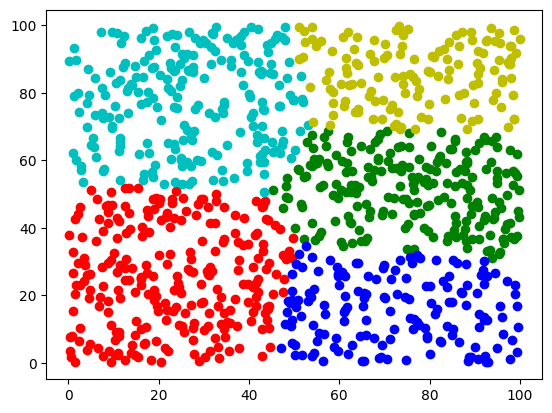

In [101]:
for key in cluster:
    for x,y in cluster[key]:
        plt.scatter(x,y, c=colors[key])